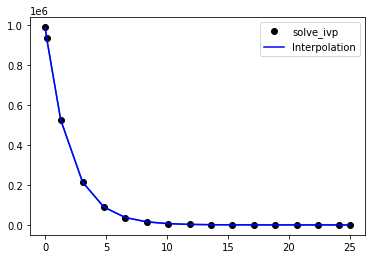

In [1]:
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
import numpy as np

α = 0.5
β = 0.3 
N = 1000000 
S = 990000 
I = 7000
R = 3000 
t0 = 0
tf = 25

def dSdt(t, y):
    return -α * y

result_dSdt = dSdt([t0, tf], S)

result = solve_ivp(dSdt, [t0, tf], [S], dense_output=True)

t_dSdt, y_dSdt = result.t, result.y[0]

plt.plot(t_dSdt, y_dSdt)
z_dSdt, = result.sol(t_dSdt)
plt.plot(t_dSdt, y_dSdt, 'o', color='k', label='solve_ivp')

plt.plot(t_dSdt, z_dSdt, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [30]:
result

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000022A88C0B1F0>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

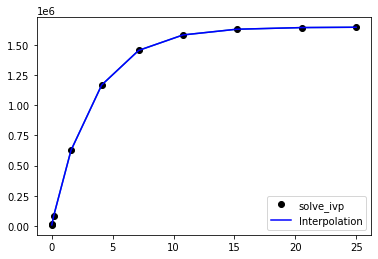

In [2]:
def dIdt(t, y):
    return -result_dSdt - β * y

result_dIdt = dSdt([t0, tf], I)


result1 = solve_ivp(dIdt, [t0, tf], [I], dense_output=True)

t_dIdt, y_dIdt = result1.t, result1.y[0]

plt.plot(t_dIdt, y_dIdt)
z_dIdt, = result1.sol(t_dIdt)
plt.plot(t_dIdt, y_dIdt, 'o', color='k', label='solve_ivp')
plt.plot(t_dIdt, z_dIdt, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [43]:
result1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000022A8D044A30>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.57638466e+00,
       4.09668025e+00, 7.13150903e+00, 1.07798905e+01, 1.51745303e+01,
       2.05917915e+01, 2.50000000e+01])
 t_events: None
        y: array([[   7000.        ,   13985.10940782,   82223.53825977,
         626107.31734365, 1169203.86919079, 1456434.29023814,
        1585057.25048462, 1632452.43906188, 1646369.12864033,
        1649022.69331715]])
 y_events: None

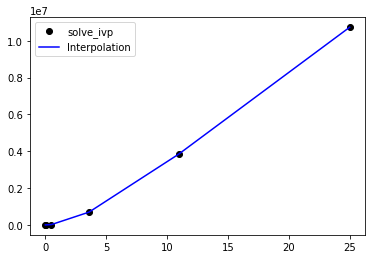

In [4]:
def dRdt(t, _):
    return β * y

result2 = solve_ivp(dRdt, [t0, tf], [R], dense_output=True)

t_dRdt, y_dRdt = result2.t, result2.y[0]
z_dRdt, = result2.sol(t_dRdt)
plt.plot(t_dRdt, y_dRdt, 'o', color='k', label='solve_ivp')
plt.plot(t_dRdt, z_dRdt, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [70]:
result2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000022A8F816F80>
   status: 0
  success: True
        t: array([ 0.        ,  0.12722597,  1.39948569,  4.88653886,  9.11131959,
       13.61974945, 18.24276743, 22.91297037, 25.        ])
 t_events: None
        y: array([[3.00000000e+03, 3.11671661e+03, 4.56518215e+03, 1.29953627e+04,
        4.61549174e+04, 1.78477599e+05, 7.14278640e+05, 2.89930556e+06,
        5.42265065e+06]])
 y_events: None

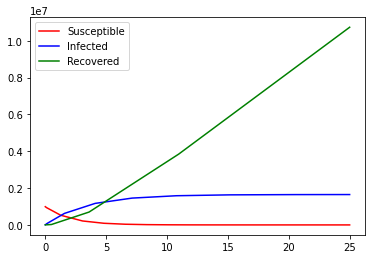

In [8]:
plt.plot(t_dSdt, z_dSdt, color='red', label='Susceptible')
plt.plot(t_dIdt, z_dIdt, color='blue', label='Infected')
plt.plot(t_dRdt, z_dRdt, color='green', label='Recovered')
plt.legend()
plt.show()